<a href="https://colab.research.google.com/github/nicoavilan/Metodos-Numericos/blob/main/Diferencias-finitas/Ec_Onda_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación de onda 1D

Solución de 
$$\frac{\partial^2 U}{\partial t^2}(t,x)= c^2 \frac{\partial^2 U}{\partial x^2}(t,x) $$
para $0< t < T = 20$ y $0< x < L = 2$

con condiciones inciales

$$U(t,0)= 0,\qquad  U(t,L)= 0\qquad U(0,x) = \left(\sin\frac{\pi x}{L}\right),\qquad \frac{\partial U}{\partial t}(t,x)\huge\vert_{t = 0}=0 $$

con parámetros $L=2$, $c=0.3$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

(c*ht/hx)**2= 0.08138769400030661


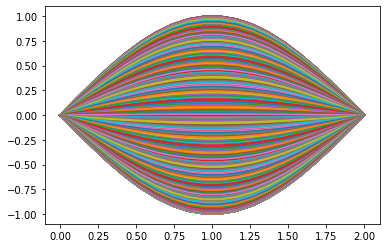

In [13]:
fil = 1000
col = 20

M = np.zeros((fil,col))

L = 2
T = 100
c = 0.3

ht = T/(fil-1)
hx = L/(col-1)
print("(c*ht/hx)**2=",(c*ht/hx)**2)


x = np.linspace(0,2,col)
M[0,:] = np.sin(np.pi*x/L)
M[1,:] = M[0,:] 


for n in range(1,fil-1):
  for m in range(1,col-1):
    M[n+1,m] = 2*M[n,m] - M[n-1,m]  + (c*ht/hx)**2*(M[n,m+1] -2*M[n,m] + M[n,m-1])
  plt.plot(x,M[n,:])
plt.show()

## Animación

In [14]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

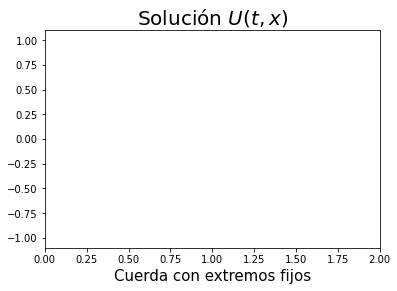

In [15]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((-1.1, 1.1))

line, = ax.plot([], [], lw=3, color="red")
ax.set_title("Solución $U(t,x)$", size=20)
ax.set_xlabel("Cuerda con extremos fijos", size= 15);

In [16]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    y = M[i,:]
    line.set_data(x, y)
    return (line,)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=fil, interval=50, blit=True)
HTML(anim.to_html5_video())

La animación se observa al ejecutar el código, GitHub no la genera automáticamente.